In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

<font color=2f416d size=4>參考連結</font>

1. [Binary Search Tree: Intro(簡介)](http://alrightchiu.github.io/SecondRound/binary-search-tree-introjian-jie.html)
2. [a simple implementation of a Binary Search Tree in Python](https://gist.github.com/jakemmarsh/8273963)

3. [Binary Tree and Binary Search Tree in Data Structure](https://www.youtube.com/watch?time_continue=1&v=7vw2iIdqHlM&feature=emb_logo)
4. [Binary Trees : Introduction and Traversal Algorithms](https://www.youtube.com/watch?v=6oL-0TdVy28)

5. [我自己寫的Heapsort](https://github.com/mandy331/Data-Structure_PythonNote/blob/master/Week7/HeapSort%E6%B5%81%E7%A8%8B%E5%9C%96%26%E8%AA%AA%E6%98%8E2.ipynb)

<font color=2f416d size=4>Binary Search Tree Introduction</font>

Binary Search Tree和Binary Tree的不同是，Binary Search Tree是有排序過的Binary Tree。

+ 必須符合CurrentNode.left.val <= CurrentNode.val < CurrentNode.right.val
+ 由TreeNode所組成，每一個TreeNode一定要紀錄value. left(左節點). right(右節點)。
+ 有新增、搜尋、刪除、替換四大必備功能。
+ 讀BST有三種不同走訪方法：
    + Preorder : root => left => right (我使用的是這個)
    + Inorder : left => root => right
    + Postorder : left => right => root

<font color=2f416d size=4>先畫個圖吧!</font></br>

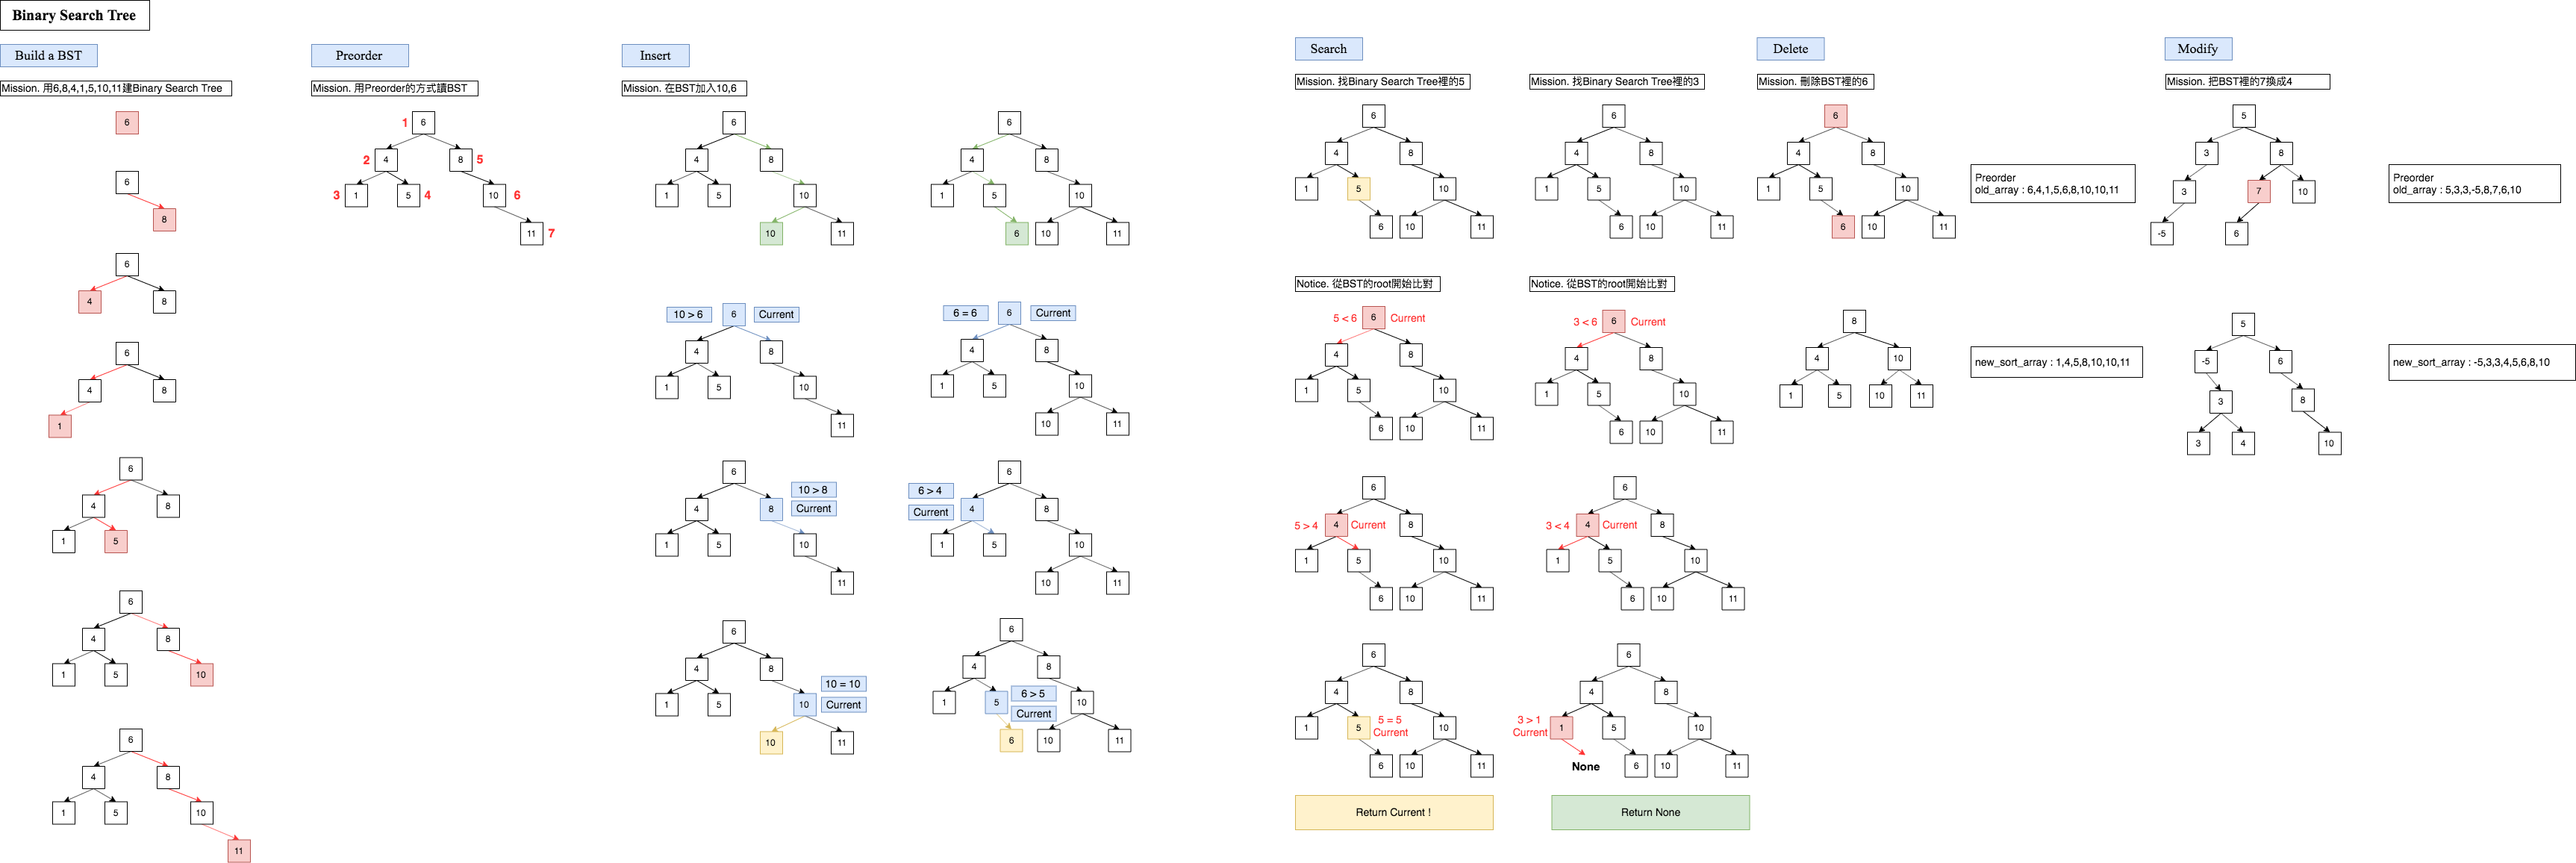

In [2]:
from IPython.display import Image
Image(filename = "BinarySearchTree.png", height = 1000, width = 1500)

<font color=2f416d size=4>我對BST的想法：</font>

1. Insert:
    - 從root開始新增Node：
        + 如果root為空，則add_root。
        + 如果root不為空，則root為Current，並開始比較和Current的大小。
    - 和CurrentNode比較大小：
        + 如果val <= Current.val，且Current.left存在時，Current變成Current.left並繼續比較。
        + 如果val > Current.val，且Current.right存在時，Current變成Current.right並繼續比較。
    - 新增Node：
        + 當Current為空時，則代表比較結束，Current = TreeNode(val)。

2. Search: 
    - 第一次從root開始搜尋，因此root為Current。
    - 比較target和Current的大小：
         + 如果 target <= Current.val，那麼Current變成Current.left，且Current.left有可能不存在。
         + 如果 target > Current.val，那麼Current變成Current.right，且Current.left有可能不存在。
    - 搜尋成功和失敗：
         + 只要target == Current.val，即返回Current。
         + 只要Current == None，就返回None。
         
3. delete:
    - 可能會有以下這幾種情況：
        + 刪除值不存在Tree裡
        + 刪除值在整個Tree裡只有1個
        + 刪除值在整個Tree裡有超過1個
    - 我的想法是：
        + 用Preorder的方式先讀1次，然後把值都加入old_array，再把不是刪除值的數字加入new_array，最後重新建BST。
        + 會這樣做的原因是因為有可能刪除值是root，整個重建會比較好，不然不知道要挑哪個當root。


4. modify:
    - 可能會有以下幾種情況:
        + 修改值不存在Tree裡
        + 修改值在整個Tree裡只有1個
        + 修改值在整個Tree裡有超過1個
    - 我的想法是：
        + 一樣用Preorder的方式先讀1次，然後把值都加到一個array，再新建一個array並儲存修改過後的值，最後重新建BST。
        + 這樣做的好處是避免改變值後，不符合BST的排列規則，所以重建BST比較好。


In [3]:
# 0-1. 先建一棵BinarySearchTree
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
a1 = TreeNode(6)
a2 = TreeNode(8)
a3 = TreeNode(4)
a4 = TreeNode(1)
a5 = TreeNode(5)
a6 = TreeNode(10)
a7 = TreeNode(11)

###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###              \ 
###              11

a1.right = a2
a1.left = a3
a3.left = a4
a3.right = a5
a2.right = a6
a6.right = a7


In [4]:
# 0-2. 搞清楚Preorder的走法
# Preorder是由根節點往左邊讀完再讀右邊的方式
class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
        
    def Preorder(self, start, traversal = ""):
        """Root > Left > Right""" 
        if start: 
            traversal += (str(start.val) + "-")
            traversal = self.Preorder(start.left, traversal)
            traversal = self.Preorder(start.right, traversal)
        return traversal

aa = BinarySearchTree()
aa.Preorder(a1,"")

'6-4-1-5-8-10-11-'

In [5]:
a1 = TreeNode(6)
a2 = TreeNode(8)
a3 = TreeNode(4)
a4 = TreeNode(1)
a5 = TreeNode(5)
a6 = TreeNode(10)
a7 = TreeNode(11)

###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###              \ 
###              11

a1.right = a2
a1.left = a3
a3.left = a4
a3.right = a5
a2.right = a6
a6.right = a7

# 1. insert
class BinarySearchTree(object):
    def __init__(self):
        self.root = None
        self.change = None
    
    def add_root(self, val):
        self.root = TreeNode(val)

    def insert(self, Current, val): # Current為TreeNode
        if self.root is None: # 當BST沒有root時，則將Current這個TreeNode建到BST裡。
            self.root = Current
            return self.insertNode(self.root, val)
        else: # 有可能會有BST已經有root的情況，所以直接把Current當做現在比較的Node，繼續insertNode進去BST。
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        # 比較插入值和Current大小，大的往右邊，小於等於的往左邊，因為Current不會為None，所以不另設一個是否Current存在的判別式。
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right
                 

###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###            /  \ 
###           10   11
aa = BinarySearchTree()
print(aa.insert(a1,10) == a1.right.right.left)
print(a1.val)
print(a1.right.right.left.val) 
print(aa.root.val)
print(aa.root.right.right.left.val)

True
6
10
6
10


這邊寫第一次的時候，發現原本的想法不太對，所以改成了兩個insert和insertNode兩個Function:


這樣子的寫法可以控制BST這個Function的樹是否有建立成功，因為我第一次寫的時候只把丟進去的Tree新增好Node，而沒有考慮到BST的這棵樹是否有被更新。

In [6]:
# 2. Search 
a1 = TreeNode(6)
a2 = TreeNode(8)
a3 = TreeNode(4)
a4 = TreeNode(1)
a5 = TreeNode(5)
a6 = TreeNode(10)
a7 = TreeNode(11)

###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###              \ 
###              11

a1.right = a2
a1.left = a3
a3.left = a4
a3.right = a5
a2.right = a6
a6.right = a7

class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)

    def insert(self, Current, val):
        if self.root is None:
            self.root = Current
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right
    
     
    def search(self, Current, target): # Current由根節點開始
        # Search的Current可能會是None，當Current為None時代表搜尋失敗，就要返回None。
        if Current is None:
            return None
        
        else:
            if target == Current.val: # 當Current.val == target的時候，代表搜尋成功，返回Current。
                return Current

            if target <= Current.val: # 當target小於等於Current.val時，繼續往Current.left比較，且不用在意Current.left是否存在，若不存在會返回None。
                return self.search(Current.left, target)

            else: # 當target大於Current.val時，繼續往Current.right比較，也不用在意Current.right是否存在，若不存在會返回None。
                return self.search(Current.right, target)
        
        
aa = BinarySearchTree()
print(aa.search(a1,10) == a1.right.right)

True


In [7]:
# 3. Delete 
# 3-1. 要先利用preorder讀取tree，並新增至array。

a1 = TreeNode(6)
a2 = TreeNode(8)
a3 = TreeNode(4)
a4 = TreeNode(1)
a5 = TreeNode(5)
a6 = TreeNode(10)
a7 = TreeNode(11)

a1.right = a2
a1.left = a3
a3.left = a4
a3.right = a5
a2.right = a6
a6.right = a7

###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###              \ 
###              11


class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def preorder_array(self, start, array): # 先把所有數字用Preorder方式讀取，並新增至array。
        """Root > Left > Right"""
        if type(array) == list:
            if start:
                array.append(start.val)
                self.preorder_array(start.left, array)
                self.preorder_array(start.right, array)
            return array
        
aa = BinarySearchTree()
aa.preorder_array(a1,[])

[6, 4, 1, 5, 8, 10, 11]

In [8]:
# 3. Delete 
# 3-2. 把在preorder_array中產生的old_array中不含target的值加到new_array，並且將new_array的第一個設為root。
class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def preorder_array(self, start, array): 
        """Root > Left > Right"""
        if type(array) == list:
            if start:
                array.append(start.val)
                self.preorder_array(start.left, array)
                self.preorder_array(start.right, array)
            return array
    
    def insert(self, Current, val): 
        if self.root is None:
            self.root = Current
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right
    
    def delete(self, Current, target):
        old_array = self.preorder_array(self, Current, []) # 含有tree所有數值的array
        new_array = [i for i in old_array if i != target] # 剔除掉含有target的值
        self.add_root(new_array[0]) # 設第一個為root

In [9]:
# 3. Delete 
# 3-3. 把new_array從new_array[1]開始依次insertNode進tree裡。
a1 = TreeNode(6)
a2 = TreeNode(8)
a3 = TreeNode(4)
a4 = TreeNode(1)
a5 = TreeNode(5)
a6 = TreeNode(10)
a7 = TreeNode(11)
a8 = TreeNode(6)
a9 = TreeNode(10)

###         6
###      /    \
###     4      8
###    / \      \
###   1   5      10
###        \    /   \ 
###         6  10   11

a1.right = a2
a1.left = a3
a3.left = a4
a3.right = a5
a2.right = a6
a6.right = a7
a5.right = a8
a6.left = a9

class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def Preorder(self, start, traversal = ""):
        """Root > Left > Right""" 
        if start: 
            traversal += (str(start.val) + "-")
            traversal = self.Preorder(start.left, traversal)
            traversal = self.Preorder(start.right, traversal)
        return traversal
    
    def preorder_array(self, start, array): 
        if type(array) == list:
            if start:
                array.append(start.val)
                traversal = self.preorder_array(start.left, array)
                traversal = self.preorder_array(start.right, array)
            return array
        
    def insert(self, Current, val): 
        if self.root is None:
            self.root = Current
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right
    
    def delete(self, Current, target):
        old_array = self.preorder_array(Current, []) # 含有tree所有數值的array
        new_array = [i for i in old_array if i != target] # 剔除掉含有target的值
        self.add_root(new_array[0]) # 設第一個為root
        for k in range(1, len(new_array)): 
            self.insert(self.root, new_array[k]) # 依序insert new_array裡的其他Node
        return self.root.val

# old_array = [6, 4, 1, 5, 6, 8, 10, 10, 11]
###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###        \    /  \ 
###         6  10   11 

# new_array = [4, 1, 5, 8, 10, 10, 11]
###        4
###      /   \
###     1     5
###            \
###             8
###              \ 
###              10
###             /  \
###            10   11           
aa = BinarySearchTree()
aa.delete(a1,6)

4

新建的BST比原本的BST的Height要，代表我之前的想法不夠深入，要重新再完善一下我的想法。

3. delete:
    - 可能會有以下這幾種情況：
        + 刪除值不存在Tree裡
        + 刪除值在整個Tree裡只有1個
        + 刪除值在整個Tree裡有超過1個
    - 我的想法是：
        + 用Preorder的方式先讀1次，然後把值都加入old_array，再把不是刪除值的數字加入new_array，最後重新建BST。
        + 會這樣做的原因是因為有可能刪除值是root，整個重建會比較好，不然不知道要挑哪個當root。
    - 更正版：
        + 用上面的想法做的話，新建的BST的Height會比原本的BST的Height高，所以改成：
        + 用Preorder的方式先讀1次，然後把值都加入old_array，再把不是刪除值的數字加入new_array後，用Heapsort的方式把new_array排序，並且選擇中間的值當做root，再重新建BST。



In [10]:
# 3. Delete 
# 3-5. 重新更正delete，加入heap_sort幫助排序完後選擇root，來解決樹高的問題。
a1 = TreeNode(6)
a2 = TreeNode(8)
a3 = TreeNode(4)
a4 = TreeNode(1)
a5 = TreeNode(5)
a6 = TreeNode(10)
a7 = TreeNode(11)
a8 = TreeNode(6)
a9 = TreeNode(10)

###         6
###      /    \
###     4      8
###    / \      \
###   1   5      10
###        \    /   \ 
###         6  10   11

a1.right = a2
a1.left = a3
a3.left = a4
a3.right = a5
a2.right = a6
a6.right = a7
a5.right = a8
a6.left = a9

class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def Preorder(self, start, traversal = ""):
        """Root > Left > Right""" 
        if start: 
            traversal += (str(start.val) + "-")
            traversal = self.Preorder(start.left, traversal)
            traversal = self.Preorder(start.right, traversal)
        return traversal
    
    def preorder_array(self, start, array): 
        if type(array) == list:
            if start:
                array.append(start.val)
                self.preorder_array(start.left, array)
                self.preorder_array(start.right, array)
            return array
        
    def insert(self, Current, val):
        if self.root is None:
            self.root = Current
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right
    
    def delete(self, Current, target):
        # Preorder先讀一遍BST，再把不為target的值加到new_array
        old_array = self.preorder_array(Current, [])
        new_array = [i for i in old_array if i != target]
        
        # 將new_array用之前寫過的heap_sort來排序，並且挑選中間的節點作為root，這樣子可以確保新建的BST樹高不會大於原本的樹高。
        new_sort_array = self.heap_sort(new_array)
        root_index = len(new_sort_array) // 2
        self.add_root(new_sort_array[root_index])
        
        # 再把除了root以外的值，依序insert到tree裡面
        for k in range(len(new_sort_array)):
            if k != root_index:
                self.insert(self.root, new_sort_array[k])
        return self.root
    
    # 引用我之前寫的heap_sort
    def heap_sort(self, nums): 
        self.array = nums
        self.heapsize = len(nums)
        self.BuildMaxHeap(self.array)
        for i in range(len(self.array) - 1):
            heaplast = (len(self.array) - 1) - i
            self.array[0], self.array[heaplast] = self.array[heaplast], self.array[0]
            self.heapsize = self.heapsize - 1
            self.Heapify(self.array,0)
        return self.array

    def BuildMaxHeap(self, array): 
        n = self.heapsize
        for j in range(n//2 + 1):
            i = n//2 - j        
            self.Heapify(self.array, i)

    def Heapify(self, array, i):
        left = 2 * i + 1
        right = 2 * i + 2

        if left <= self.heapsize - 1 and self.array[left] > self.array[i]:
            Max = left
        else:
            Max = i
        if right <= self.heapsize - 1 and self.array[right] > self.array[Max]:
            Max = right
        if Max != i:
            self.array[i], self.array[Max] = self.array[Max], self.array[i]
            self.Heapify(self.array, Max)
    

# old_array = [6, 4, 1, 5, 6, 8, 10, 10, 11]
###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###        \    /  \ 
###         6  10   11 

# new_array = [4, 1, 5, 8, 10, 10, 11]
# new_sort_array = [1, 4, 5, 8, 10, 10, 11]
###         8
###      /    \
###     1      10
###      \    /  \ 
###       4  10   11
###        \        
###         5      
aa = BinarySearchTree()
a1 = aa.delete(a1,6) 
print(a1.val)
print(a1.left.val)
print(a1.left.right.val)
print(a1.left.right.right.val)
print(a1.right.val)
print(a1.right.left.val)
print(a1.right.right.val)

8
1
4
5
10
10
11


In [11]:
#4. modify
#4-1. 要先利用preorder讀取tree，並新增至array。
#4-2. 把在preorder中產生的old_array中含有target的變成新值並加到new_array，並且將new_array的第一個設為root。
#4-3. 把new_array從new_array[1]開始依次insertNode進tree裡。
#4-4. 再驗證一次新建的BST。
a1 = TreeNode(6)
a2 = TreeNode(8)
a3 = TreeNode(4)
a4 = TreeNode(1)
a5 = TreeNode(5)
a6 = TreeNode(10)
a7 = TreeNode(11)
a8 = TreeNode(6)
a9 = TreeNode(10)

###         6
###      /    \
###     4      8
###    / \      \
###   1   5      10
###        \    /   \ 
###         6  10   11

a1.right = a2
a1.left = a3
a3.left = a4
a3.right = a5
a2.right = a6
a6.right = a7
a5.right = a8
a6.left = a9

class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def Preorder(self, start, traversal = ""):
        """Root > Left > Right""" 
        if start: 
            traversal += (str(start.val) + "-")
            traversal = self.Preorder(start.left, traversal)
            traversal = self.Preorder(start.right, traversal)
        return traversal
    
    def preorder_array(self, start, array): 
        if type(array) == list:
            if start:
                array.append(start.val)
                self.preorder_array(start.left, array)
                self.preorder_array(start.right, array)
            return array
    
    def insert(self, Current, val): 
        if self.root is None:
            self.root = Current
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right        
    
        
    def modify(self, Current, target, new_val):
        old_array = self.preorder_array(Current, []) # 利用Preorder的方式讀tree，並加至old_array
        new_array = [] 
        for i in old_array:
            if i == target: # 只要tree中的數值為target，就替換成new_val，再加到new_array。
                i = new_val
                new_array.append(i)
            else:
                new_array.append(i)
                
        self.add_root(new_array[0]) # 設定第一個為根節點
        for k in range(1, len(new_array)):
            self.insert(self.root, new_array[k]) # 再依序加入剩下的節點
        return self.root

# old_array = [6, 4, 1, 5, 6, 8, 10, 10, 11]
###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###        \    /  \ 
###         6  10   11 

# new_array = [4, 4, 1, 5, 6, 8, 10, 10, 11]
###         4
###      /    \
###     4      5
###    /        \
###   1          8
###    \          \ 
###     4         10
###             /  \
###            10   11
aa = BinarySearchTree()
a1 = aa.modify(a1,6,4)        
print(a1.val)
print(a1.left.val)
print(a1.left.left.val)
print(a1.left.left.right.val)
print(a1.right.val)
print(a1.right.right.val)
print(a1.right.right.right.val)
print(a1.right.right.right.left.val)
print(a1.right.right.right.right.val)

4
4
1
4
5
8
10
10
11


新建的BST比原本的BST的Height要，也是跟delete一樣需要重新做修改。

4. modify:
    - 可能會有以下幾種情況:
        + 修改值不存在Tree裡
        + 修改值在整個Tree裡只有1個
        + 修改值在整個Tree裡有超過1個
    - 我的想法是：
        + 一樣用Preorder的方式先讀1次，然後把值都加到一個array，再新建一個array並儲存修改過後的值，最後重新建BST。
        + 這樣做的好處是避免改變值後，不符合BST的排列規則，所以重建BST比較好。
    - 更改版：
        + 用上面這個方式做，一樣沒考慮到樹高的問題，所以要做修改：
        + 這邊改成是用Preorder的方式先讀1次，然後把值都加到一個array，再新建一個array並儲存修改過後的值，再用HeapSort排序後，選取中間的值當作root，再重建BST。

In [12]:
#4. modify
#4-5. 重新修正modify的Function，加入heap_sort的Function來幫助排序，並挑選中間的值作為root，再建立BST。
class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def Preorder(self, start, traversal = ""):
        """Root > Left > Right""" 
        if start: 
            traversal += (str(start.val) + "-")
            traversal = self.Preorder(start.left, traversal)
            traversal = self.Preorder(start.right, traversal)
        return traversal
    
    def preorder_array(self, start, array): 
        if type(array) == list:
            if start:
                array.append(start.val)
                self.preorder_array(start.left, array)
                self.preorder_array(start.right, array)
            return array
        
    def insert(self, Current, val):
        if self.root is None:
            self.root = Current
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right   
    
    def modify(self, Current, target, new_val):
        # 用Preodrder的方式讀取BST並加到array，並把array中為target的值替換成new_val
        old_array = self.preorder_array(Current, [])
        new_array = []
        for i in old_array:
            if i == target:
                i = new_val
                new_array.append(i)
            else:
                new_array.append(i)
        
        # 用之前寫過的heap_sort來排序，並且這次選擇len(new_sort_array)//2 - 1的index當作root。
        new_sort_array = self.heap_sort(new_array)
        root_index = len(new_sort_array)//2 - 1
        self.add_root(new_sort_array[root_index])
        
        # 把除了root以外的數值依序加入新建的BST
        for k in range(len(new_sort_array)):
            if k != root_index:
                self.insert(self.root, new_sort_array[k])
        return self.root
    
    # 調用之前用過的heap_sort
    def heap_sort(self, nums):
        self.array = nums
        self.heapsize = len(nums)
        self.BuildMaxHeap(self.array)
        for i in range(len(self.array) - 1):
            heaplast = (len(self.array) - 1) - i
            self.array[0], self.array[heaplast] = self.array[heaplast], self.array[0]
            self.heapsize = self.heapsize - 1
            self.Heapify(self.array,0)
        return self.array

    def BuildMaxHeap(self, array): 
        n = self.heapsize
        for j in range(n//2 + 1):
            i = n//2 - j        
            self.Heapify(self.array, i)

    def Heapify(self, array, i):
        left = 2 * i + 1
        right = 2 * i + 2

        if left <= self.heapsize - 1 and self.array[left] > self.array[i]:
            Max = left
        else:
            Max = i
        if right <= self.heapsize - 1 and self.array[right] > self.array[Max]:
            Max = right
        if Max != i:
            self.array[i], self.array[Max] = self.array[Max], self.array[i]
            self.Heapify(self.array, Max)
    

# old_array = [6, 4, 1, 5, 6, 8, 10, 10, 11]
###        6
###      /   \
###     4     8
###    / \     \
###   1   5     10
###        \    /  \ 
###         6  10   11 

# new_array = [4, 4, 1, 5, 4, 8, 10, 10, 11]
# new_sort_array = [1, 4, 4, 4, 5, 8, 10, 10, 11]
###         4
###      /    \
###     1      5
###      \       \
###       4       8
###      /         \ 
###     4         10
###             /  \
###            10   11
aa = BinarySearchTree()
a1 = aa.modify(a1,6,4)        
print(a1.val)
print(a1.left.val)
print(a1.left.right.val)
print(a1.left.right.left.val)
print(a1.right.val)
print(a1.right.right.val)
print(a1.right.right.right.val)
print(a1.right.right.right.left.val)
print(a1.right.right.right.right.val)

4
1
4
4
5
8
10
10
11


modify完後還是大於原樹高，感覺是root選擇的問題，看來只能畫圖了，來看選擇哪個root比較適合，剛剛測delete的時候可能剛好選擇的root比較好，所以沒有這個問題，但是跟modify一樣要重新思考root的選擇問題。

結果我要畫圖的時候，突然覺得不是root的問題是insertNode的順序問題，現在的順序是排序好的array由0開始依次加入，那麼小的數字先加，再加大的數字一定會讓BST的樹高變很高，所以應該加Node的時候要由root開始往左右邊加，左邊的話就是從root_index - 1開始加到0，然後右邊的話就是從root_index + 1加到最後，先來畫一下看會不會比較好。  

In [13]:
old_array = [6, 4, 1, 5, 6, 8, 10, 10, 11]
#        6
#      /   \
#     4     8
#    / \     \
#   1   5     10
#        \    /  \ 
#         6  10   11 

new_array = [4, 4, 1, 5, 4, 8, 10, 10, 11]
new_sort_array = [1, 4, 4, 4, 5, 8, 10, 10, 11]

#        4
#       / \
#      4   5
#     /     \
#    4       8
#   /         \
#  1           10
#             /  \
#            10   11

畫出來不對，不是insertNode的順序問題，結果我發現問題出在我的測資沒辦法讓新樹高小於等於原樹高，所以重點在於換測資...
這裡發現到delete因為是刪node的關係，所以小於等於原樹高很正常，可是modify是要在換數字後小於等於原樹高就很困難，因為沒辦法確保替換後的值，但是助教說了不會有「不行新樹高小於等於原樹高情況」的測資，所以我就放心換測資，再來試一遍。

In [14]:
# 4. modify
# 4-5. 新建一棵BinarySearchTree
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
b1 = TreeNode(5)
b2 = TreeNode(3)
b3 = TreeNode(8)
b4 = TreeNode(3)
b5 = TreeNode(-5)
b6 = TreeNode(7)
b7 = TreeNode(6)
b8 = TreeNode(10)

b1.left = b2
b1.right = b3
b2.left = b4
b4.left = b5
b3.left = b6
b6.left = b7
b3.right = b8

###        5
###      /   \
###     3     8
###    /     /  \
###   3     7   10
###  /     /       
### -5    6 

In [15]:
#4. modify
#4-6. 重新換測資，看可不可行。
class BinarySearchTree(object):
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def Preorder(self, start, traversal = ""):
        """Root > Left > Right""" 
        if start: 
            traversal += (str(start.val) + "-")
            traversal = self.Preorder(start.left, traversal)
            traversal = self.Preorder(start.right, traversal)
        return traversal
    
    def preorder_array(self, start, array): 
        if type(array) == list:
            if start:
                array.append(start.val)
                self.preorder_array(start.left, array)
                self.preorder_array(start.right, array)
            return array
        
    def insert(self, Current, val):
        if self.root is None:
            self.root = Current
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(Current, val)
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right   
    
    def modify(self, Current, target, new_val):
        # 用Preodrder的方式讀取BST並加到array，並把array中為target的值替換成new_val
        old_array = self.preorder_array(Current, [])
        new_array = []
        for i in old_array:
            if i == target:
                i = new_val
                new_array.append(i)
            else:
                new_array.append(i)
        
        # 用之前寫過的heap_sort來排序，並且這次選擇len(new_sort_array)//2的index當作root。
        new_sort_array = self.heap_sort(new_array)
        root_index = len(new_sort_array)//2
        self.add_root(new_sort_array[root_index])
        
        # 把除了root以外的數值依序加入新建的BST
        for k in range(len(new_sort_array)):
            if k != root_index:
                self.insert(self.root, new_sort_array[k])
        return self.root
    
    # 調用之前用過的heap_sort
    def heap_sort(self, nums):
        self.array = nums
        self.heapsize = len(nums)
        self.BuildMaxHeap(self.array)
        for i in range(len(self.array) - 1):
            heaplast = (len(self.array) - 1) - i
            self.array[0], self.array[heaplast] = self.array[heaplast], self.array[0]
            self.heapsize = self.heapsize - 1
            self.Heapify(self.array,0)
        return self.array

    def BuildMaxHeap(self, array): 
        n = self.heapsize
        for j in range(n//2 + 1):
            i = n//2 - j        
            self.Heapify(self.array, i)

    def Heapify(self, array, i):
        left = 2 * i + 1
        right = 2 * i + 2

        if left <= self.heapsize - 1 and self.array[left] > self.array[i]:
            Max = left
        else:
            Max = i
        if right <= self.heapsize - 1 and self.array[right] > self.array[Max]:
            Max = right
        if Max != i:
            self.array[i], self.array[Max] = self.array[Max], self.array[i]
            self.Heapify(self.array, Max)
    

# old_array = [5, 3, 3, -5, 8, 7, 6, 10]
###        5
###      /   \
###     3     8
###    /     /  \
###   3     7   10
###  /     /       
### -5    6 
# new_array = [5, 3, 3, -5, 8, 4, 6, 10]
# new_sort_array = [-5, 3, 3, 4, 5, 6, 8, 10]
###        5
###      /   \
###     -5    6
###      \     \
###       3     8
###      / \      \  
###     3   4      10

aa = BinarySearchTree()
b1 = aa.modify(b1,7,4)        
print(b1.val)
print(b1.left.val)
print(b1.left.right.val)
print(b1.left.right.left.val)
print(b1.left.right.right.val)
print(b1.right.val)
print(b1.right.right.val)
print(b1.right.right.right.val)

5
-5
3
3
4
6
8
10


我在這邊測試的時候分別試了兩種root的位置：
+ Root選 len(new_array)//2 - 1:
    + Delete : OK!
    + Modify : 失敗，新樹高會比原樹高還要大
+ Root選 len(new_array)//2:
    + Delete : OK!
    + Modify : OK! 
    + Root選擇len(new_array)//2

修改時，數字若有重複，要全部修改，而全部修改若選擇原本的Root會使原本的height變高，所以不能選原本的root，可以先把它丟回array再找新的root，要一直Run到直到Height跟原本的一樣才能找到最適合的root。

<font color=2f416d size=4>寫成Class</font>

In [16]:
# Definition for a binary tree node.
class TreeNode(object):
    def __init__(self,x):
        """
        :type val: int
        :type left: TreeNode or None
        :type right: TreeNode or None
        """
        self.val = x
        self.left = None
        self.right = None
        
class Solution(object):
    
    def __init__(self):
        self.root = None
    
    def add_root(self, val):
        self.root = TreeNode(val)
    
    def preorder_array(self, start, array): 
        if type(array) == list:
            if start:
                array.append(start.val)
                self.preorder_array(start.left, array)
                self.preorder_array(start.right, array)
            return array
        
    def insertNode(self, Current, val):  
        if val <= Current.val:
            if Current.left:
                return self.insertNode(Current.left, val)
            else:
                Current.left = TreeNode(val) 
                return Current.left
        else:
            if Current.right:
                return self.insertNode(Current.right, val)
            else:
                Current.right = TreeNode(val)
                return Current.right
    
    def heap_sort(self, nums):
        self.array = nums
        self.heapsize = len(nums)
        self.BuildMaxHeap(self.array)
        for i in range(len(self.array) - 1):
            heaplast = (len(self.array) - 1) - i
            self.array[0], self.array[heaplast] = self.array[heaplast], self.array[0]
            self.heapsize = self.heapsize - 1
            self.Heapify(self.array,0)
        return self.array

    def BuildMaxHeap(self, array): 
        n = self.heapsize
        for j in range(n//2 + 1):
            i = n//2 - j        
            self.Heapify(self.array, i)

    def Heapify(self, array, i):
        left = 2 * i + 1
        right = 2 * i + 2

        if left <= self.heapsize - 1 and self.array[left] > self.array[i]:
            Max = left
        else:
            Max = i
        if right <= self.heapsize - 1 and self.array[right] > self.array[Max]:
            Max = right
        if Max != i:
            self.array[i], self.array[Max] = self.array[Max], self.array[i]
            self.Heapify(self.array, Max)
    
    def insert(self, root, val):
        """
        :type root: TreeNode
        :type val: int
        :rtype: TreeNode(inserted node)
        """
        if self.root is None:
            self.root = root
            return self.insertNode(self.root, val)
        else:
            return self.insertNode(root, val)

    def delete(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(the root of new completed binary search tree) (cannot search())
        """
        old_array = self.preorder_array(root, [])
        new_array = [i for i in old_array if i != target]
        
        new_sort_array = self.heap_sort(new_array)
        root_index = len(new_sort_array) // 2
        self.add_root(new_sort_array[root_index])

        for k in range(len(new_sort_array)):
            if k != root_index:
                self.insert(self.root, new_sort_array[k])
        return self.root
        
        
    def search(self, root, target):
        """
        :type root: TreeNode
        :type target: int
        :rtype: TreeNode(searched node)
        """
        if root is None:
            return None
        
        else:
            if target == root.val: 
                return root

            if target <= root.val: 
                return self.search(root.left, target)

            else:
                return self.search(root.right, target)
        
    def modify(self, root, target, new_val):
        """
        :type root: TreeNode
        :type target: int
        :type new_val: int
        :rtype:TreeNode(the root of new completed binary search tree) (cannot search())
        """
        old_array = self.preorder_array(root, [])
        new_array = []
        for i in old_array:
            if i == target:
                i = new_val
                new_array.append(i)
            else:
                new_array.append(i)
        
        new_sort_array = self.heap_sort(new_array)
        root_index = len(new_sort_array)//2
        self.add_root(new_sort_array[root_index])
        
        for k in range(len(new_sort_array)):
            if k != root_index:
                self.insert(self.root, new_sort_array[k])
        return self.root
        
        

In [17]:
root1 = TreeNode(5)
b2 = TreeNode(3)
b3 = TreeNode(8)
b4 = TreeNode(3)
b5 = TreeNode(-5)
b6 = TreeNode(7)
b7 = TreeNode(6)
b8 = TreeNode(10)

root1.left = b2
root1.right = b3
b2.left = b4
b4.left = b5
b3.left = b6
b6.left = b7
b3.right = b8

###        5
###      /   \
###     3     8
###    /     /  \
###   3     7   10
###  /     /       
### -5    6 
print("insert")
print(Solution().insert(root1,4) == root1.left.right)

insert
True


In [18]:
root1 = TreeNode(5)
b2 = TreeNode(3)
b3 = TreeNode(8)
b4 = TreeNode(3)
b5 = TreeNode(-5)
b6 = TreeNode(7)
b7 = TreeNode(6)
b8 = TreeNode(10)

root1.left = b2
root1.right = b3
b2.left = b4
b4.left = b5
b3.left = b6
b6.left = b7
b3.right = b8

###        5
###      /   \
###     3     8
###    /     /  \
###   3     7   10
###  /     /       
### -5    6 
### old_array = [5,3,3,-5,8,7,6,10]
### new_array = [5,-5,8,7,6,10]
### new_sort_array = [-5,5,6,7,8,10]
###      7
###    /  \
###   -5   8
###    \    \
###     5   10
###      \
###       6
print("delete")
root1 = Solution().delete(root1,3) 
print(root1.val == 7 and root1.left.val == -5 and root1.left.right.val == 5)
print(root1.left.right.right.val == 6 and root1.right.val == 8 and root1.right.right.val == 10)
print(root1.left.left == None and root1.left.right.left == None and root1.right.left == None)
print(root1.right.right.right == None and root1.right.right.left == None)

delete
True
True
True
True


In [19]:
root1 = TreeNode(5)
b2 = TreeNode(3)
b3 = TreeNode(8)
b4 = TreeNode(3)
b5 = TreeNode(-5)
b6 = TreeNode(7)
b7 = TreeNode(6)
b8 = TreeNode(10)

root1.left = b2
root1.right = b3
b2.left = b4
b4.left = b5
b3.left = b6
b6.left = b7
b3.right = b8

###        5
###      /   \
###     3     8
###    /     /  \
###   3     7   10
###  /     /       
### -5    6 
print("search")
print(Solution().search(root1,10) == root1.right.right)

search
True


In [20]:
root1 = TreeNode(5)
b2 = TreeNode(3)
b3 = TreeNode(8)
b4 = TreeNode(3)
b5 = TreeNode(-5)
b6 = TreeNode(7)
b7 = TreeNode(6)
b8 = TreeNode(10)

root1.left = b2
root1.right = b3
b2.left = b4
b4.left = b5
b3.left = b6
b6.left = b7
b3.right = b8

###        5
###      /   \
###     3     8
###    /     /  \
###   3     7   10
###  /     /       
### -5    6 
### old_array = [5,3,3,-5,8,7,6,10]
### new_array = [5,3,3,-5,8,4,6,10]
### new_sort_array = [-5,3,3,4,5,6,8,10]
###         5
###      /     \
###     -5      6
###      \       \
###       3       8
###      / \       \    
###     3   4      10 

print("modify")
root1 = Solution().modify(root1,7,4) 
print(root1.val == 5 and root1.left.val == -5 and root1.left.right.val == 3)
print(root1.left.right.left.val == 3 and root1.left.right.right.val == 4 and root1.right.val == 6)
print(root1.right.right.val == 8 and root1.right.right.right.val == 10)

modify
True
True
True


<font color=2f416d size=4>YA希望不要有ERROR，謝謝助教看到這裡！</font>